# Homework 3 writeup solutions

## Name: Zach Gendreau

## Problem 1

### Part a

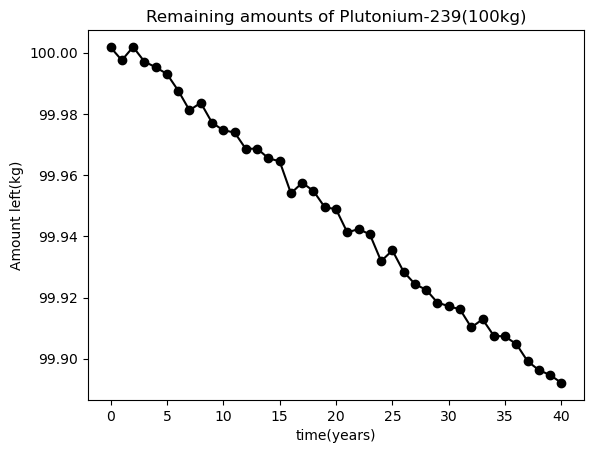

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

M = np.genfromtxt('Plutonium.csv', delimiter=',')
t = M[0, :]
P = M[1, :]
plt.plot(t,P,'-ok') 

plt.title("Remaining amounts of Plutonium-239(100kg)")
plt.xlabel("time(years)")
plt.ylabel("Amount left(kg)")
plt.show()


### Part b

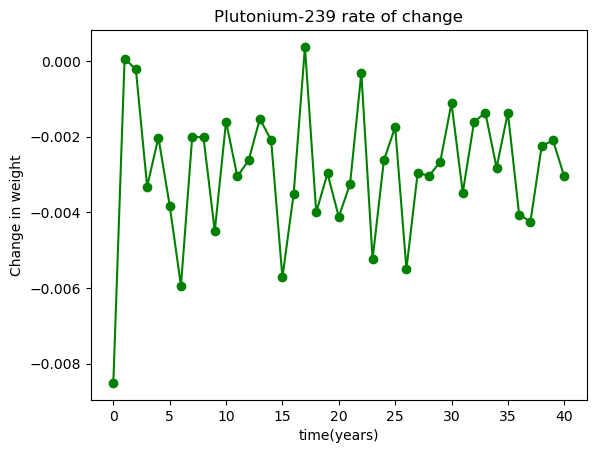

In [42]:
plt.figure()
A4 = (-3*P[0] + 4*P[1] - P[2])/(2*1)
A5 = (-3*P[40] + 4*P[39] - 1*P[38])/ (-2*1)
differences = np.zeros(41)
differences[0] = A4
differences[40] = A5
for k in range(1, len(t)-1):
    differences[k] = (P[int(k+1)] - P[int(k-1)])/2*1
plt.plot(t,differences,'-og')
plt.title("Plutonium-239 rate of change")
plt.xlabel("time(years)")
plt.ylabel("Change in weight")
plt.show()


### Part c
The plot of the derivative looks a little funny. Part of the reason its not smooth is because we have seperate data points, not a continuous function. If the original graph was not a collection of points, but rather a smooth graph, the derivative would also be smooth. Part of the crazy graph is becuase of the auto-scaling of the y-axis. The rate of change is indeed so low that small year-to-year differences look like large jumps in our graph. 

### Part d
Although the decay of Plutonium-239 is a natural process, it is not a constantly decreasing functioin with respect to time. We can see from the first graph that there were years that the amount actually *increased*, yet the overwhelming pattern is that of decreasing mass over time. This is why using the mean is a good idea for calculating a half life, the idea that we'll get a more accurate representation of the "bigger picture", rather than year-to-year outlying data. 

## Problem 2

### Part a-f

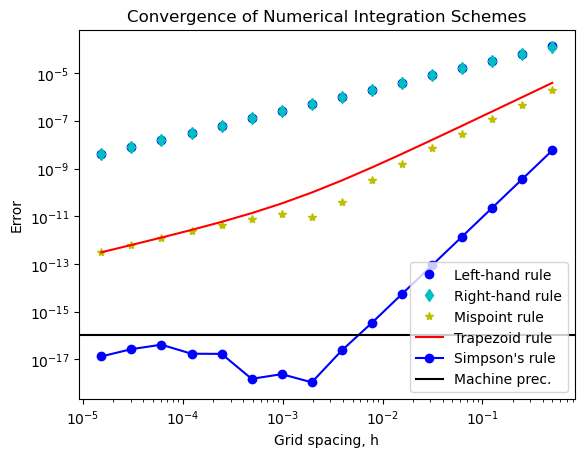

In [49]:
#Exact value
mu = 85
sigma = 8.3
integrand = lambda x: np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
output = scipy.integrate.quad(integrand, 110, 130)
exact = output[0]

power = -np.linspace(1, 16, 16) #Create step-size array 
h = 2**power

#Left-hand rule
left_rule = np.zeros(16)
for k in range(0, len(h)):
    step = h[k]
    x_vals = np.arange(110, 130+step, step)
    approx = np.zeros(len(x_vals) + 1)
    for l in range(0, len(x_vals)):
        approx[l] = (integrand(x_vals[l])) * step
    left_rule[k] = sum(approx)
abs_left = abs(exact - left_rule)

#Right-hand rule
right_rule = np.zeros(16)
for k in range(0, len(h)):
    step = h[k]
    x_vals = np.arange(110, 130+step, step)
    approx = np.zeros(len(x_vals) + 1)
    for l in range(0, len(x_vals)):
        approx[l] = (integrand(x_vals[l]+step)) * step
    right_rule[k] = sum(approx)
abs_right = abs(exact - right_rule)

#Midpoint rule 
mid_rule = np.zeros(16)
for k in range(0, len(h)):
    step = h[k]
    x_vals = np.arange(110, 130+step, step)
    approx = np.zeros(len(x_vals) + 1)
    for l in range(0, len(x_vals)):
        approx[l] = (integrand(x_vals[l] + (.5*step))) * step
    mid_rule[k] = sum(approx)
abs_mid = abs(exact - mid_rule)

#Trap rule
trap_rule = np.zeros(16)
for k in range(0, len(h)):
    step = h[k]
    x_vals = np.arange(110, 130+step, step)
    approx = np.zeros(len(x_vals) + 1)
    for l in range(0, len(x_vals)):
        approx[l] = ((integrand(x_vals[l]) + integrand(x_vals[l]+step)) / 2) * step
    trap_rule[k] = sum(approx)
abs_trap = abs(exact - trap_rule)

#Simpson's rule
simp_rule = np.zeros(16)
for k in range(0, len(h)):
    step = h[k]
    x_vals = np.arange(110, 130+step, step)
    odd_approx = 0
    for l in range(1, len(x_vals)-1, 2):
        odd_approx += integrand(x_vals[l])
    even_approx = 0
    for l in range(2, len(x_vals)-2, 2):
        even_approx += integrand(x_vals[l])
    
    tot_sum = (step/3) * (integrand(110) + integrand(130) + 4*(odd_approx) + 2*(even_approx))
    simp_rule[k] = tot_sum
abs_simp = abs(exact - simp_rule)

plt.figure()
plt.loglog(h,abs_left, 'bo',label = "Left-hand rule")
plt.loglog(h,abs_right, 'cd',label = "Right-hand rule")
plt.loglog(h,abs_mid,'y*',label = "Mispoint rule")
plt.loglog(h,abs_trap,'r',label = "Trapezoid rule")
plt.loglog(h,abs_simp,color = "blue",marker = "o",label = "Simpson's rule")
plt.axhline(y = 10e-17, color = "black", label = "Machine prec.")
plt.title("Convergence of Numerical Integration Schemes")
plt.xlabel("Grid spacing, h")
plt.ylabel("Error")
plt.legend(loc="lower right")
plt.show()

### Part g - discussion

#### (i)
From examination of the graph, we can see that Simpson's rule of approximation has the highest order of accuracy. The absolute values of the approximations are the lowest out of all the methods we've attempted. When the step size is less that 0.01, the accuracy of Simpson's rule is within the error of Machine precision. 

#### (ii)
The error for Simpson's rule seems to "level" off after it reaches 0.01. My hypothesis for this is that the computer is reaching its level of precision. Even for the "axact" value, the machine we are using is not going to be completely theoretically correct. This shows that Simpson's rule is experimentally as accurate as the exact integration when the step size reaches a certian point.